In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
def parseData(df):
    """
    处理数据
    """
#     '--'转为'未知方式'
    df['rentType'][df['rentType']=='--'] = '未知方式'
    
    # 转换object类型数据
    columns = ['rentType', 'houseFloor', 'houseToward', 'houseDecoration', 'communityName', 'region', 'plate']
    for col in columns:
        df[col] = df[col].astype('category')
        
    # 将buildYear列转换为整型数据
#     使用众数1994填充
    df['buildYear'] = np.where(df['buildYear'] == '暂无信息', 1994, df['buildYear'])
    df['buildYear'] = df['buildYear'].astype('int')
    
#     处理缺失值
    # 处理pv和uv的空值,缺失值用平均值代替
    df['pv'].fillna(df['pv'].mean(),inplace=True)
    df['uv'].fillna(df['uv'].mean(),inplace=True)
#     df['pv'] = df['pv'].astype('int')
#     df['uv'] = df['uv'].astype('int')
    
    # 去掉部分特征
    df.drop('ID',axis=1, inplace=True)
    df.drop('city',axis=1,inplace=True)
    
    # 将houseType转化为‘房间数room’，‘厅数parlor’，‘卫生间数bathroom’
    def parseRoom(info, index):
        res = int(info[index*2])
        return res
    room='room'
    bathroom='bathroom'
    parlor='parlor'
    df.insert(3,room,None)
    df.insert(4, parlor, None)
    df.insert(5, bathroom, None)
    df[room] = df['houseType'].apply(parseRoom, index=0)
    df[parlor] = df['houseType'].apply(parseRoom, index=1)
    df[bathroom] = df['houseType'].apply(parseRoom, index=2)
    df.drop('houseType', axis=1, inplace=True)
    
    return df

In [30]:
def washData(df_train, df_test):
    """
    清洗数据
    """
    df_train = df_train[(df_train['area']<=700) & (df_train['tradeMoney']<=30000)]
#     df_train = df_train[df_train['tradeMoney']<=30000]
    
    return df_train, df_test

In [31]:
def getData():
    """
    获取数据
    """
    train = pd.read_csv('dataset/train_data.csv')
    test = pd.read_csv('dataset/test_a.csv')
    
    train, test = washData(train, test)
    train = parseData(train)
    test = parseData(test)
   
    
    return train, test

In [11]:
def getInitData():
    """
    获取原始数据
    """
    train = pd.read_csv('dataset/train_data.csv')
    test = pd.read_csv('dataset/test_a.csv')
    return train, test

In [47]:
# 原始数据分析
itrain, itest = getInitData()

In [25]:
itrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 51 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

In [26]:
# buildYear众数
buildYear='buildYear'
itrain[buildYear].value_counts()[:4]

1994    2851
暂无信息    2808
2006    2007
2007    1851
Name: buildYear, dtype: int64

In [38]:
itest[buildYear].value_counts()[:4]

1994    178
1995    133
暂无信息    128
2005    101
Name: buildYear, dtype: int64

In [41]:
# # 对比 city
city='city'
itest[city].value_counts()[:4]

SH    2469
Name: city, dtype: int64

In [45]:
itrain[city].value_counts()[:4]

SH    41440
Name: city, dtype: int64

In [50]:
# 对比 area
area='area'
itest[area].value_counts()

90.00     31
70.00     25
60.00     24
50.00     22
40.00     20
76.00     19
80.00     18
89.00     18
92.00     17
57.00     14
45.00     13
55.00     12
67.00     11
64.00     11
53.00     10
74.00     10
51.00     10
75.00     10
91.00     10
54.00     10
110.00     9
130.00     9
81.00      9
52.00      9
86.00      9
65.00      8
37.00      8
69.00      8
93.00      8
115.00     8
          ..
82.13      1
46.78      1
34.74      1
117.29     1
113.02     1
37.63      1
50.19      1
77.91      1
56.39      1
44.01      1
69.09      1
47.47      1
41.85      1
94.58      1
100.71     1
36.34      1
53.72      1
119.99     1
145.85     1
42.48      1
56.52      1
64.13      1
54.60      1
38.73      1
121.77     1
122.23     1
61.83      1
107.87     1
89.72      1
67.67      1
Name: area, Length: 1677, dtype: int64

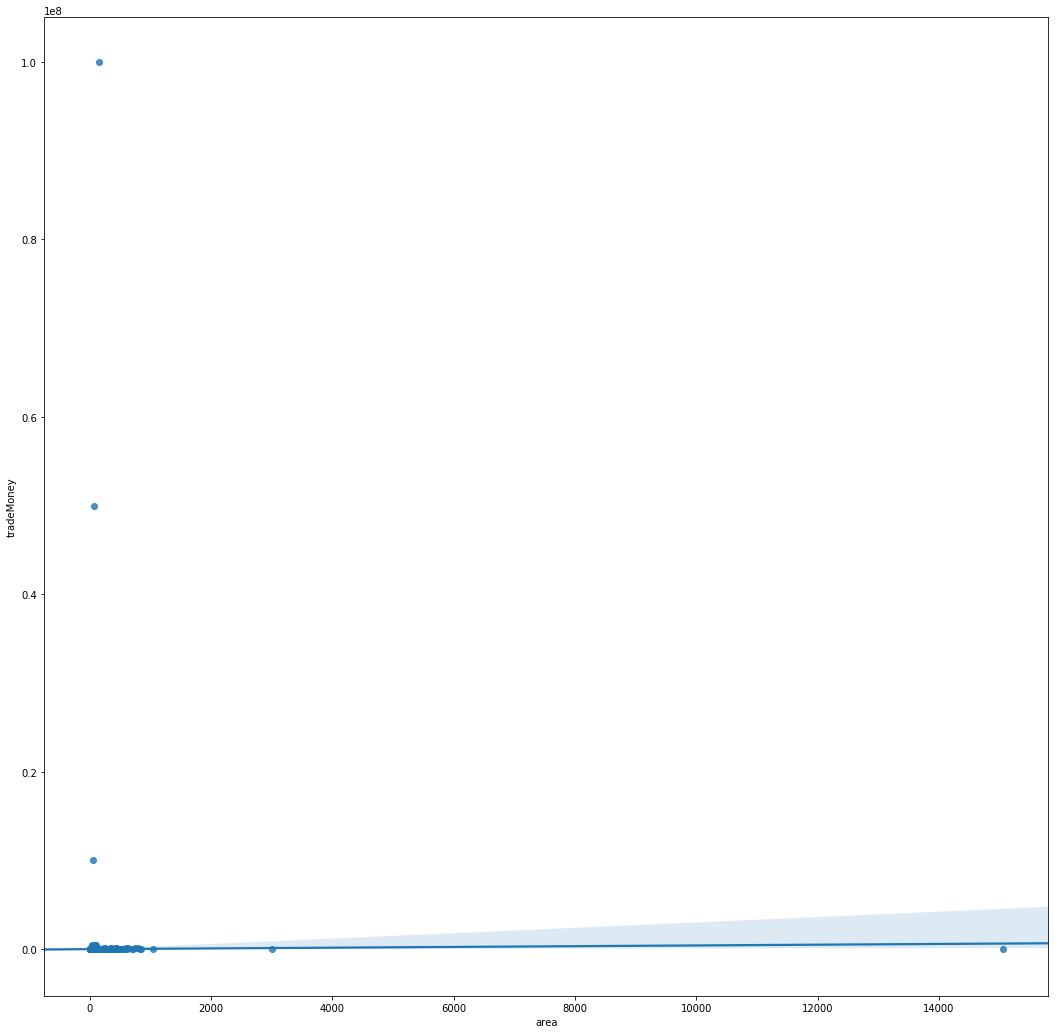

In [53]:
plt.figure(figsize = (18, 18))
sns.regplot(x='area', y='tradeMoney', data=itrain)

In [58]:
# 对比 lookNum
looknum='lookNum'
itrain[looknum].value_counts()

0     37194
1      1159
2       903
3       565
4       404
5       295
6       211
7       154
8       134
9        91
10       79
11       52
12       48
13       34
15       23
14       23
17       18
16       13
19       11
18        9
21        4
23        3
20        2
37        2
25        2
29        1
22        1
24        1
26        1
27        1
28        1
30        1
Name: lookNum, dtype: int64

In [60]:
itest[looknum].value_counts()

0     2163
1       96
2       71
3       38
4       35
5       16
6       15
7        9
8        9
9        5
10       3
17       2
12       2
15       2
14       1
11       1
16       1
Name: lookNum, dtype: int64

In [66]:
# 对比region
region='region'
itrain[region].value_counts().index

Index(['RG00002', 'RG00005', 'RG00003', 'RG00010', 'RG00012', 'RG00004',
       'RG00006', 'RG00007', 'RG00008', 'RG00013', 'RG00001', 'RG00014',
       'RG00011', 'RG00009', 'RG00015'],
      dtype='object')

In [68]:
itest[region].value_counts().index

Index(['RG00002', 'RG00005', 'RG00012', 'RG00010', 'RG00003', 'RG00004',
       'RG00007', 'RG00013', 'RG00014', 'RG00008', 'RG00001', 'RG00009',
       'RG00006', 'RG00011'],
      dtype='object')

In [76]:
plate='plate'
print(itrain[plate].value_counts().index)
itrain[plate].value_counts()

Index(['BK00031', 'BK00033', 'BK00045', 'BK00055', 'BK00056', 'BK00052',
       'BK00017', 'BK00041', 'BK00054', 'BK00051', 'BK00046', 'BK00035',
       'BK00042', 'BK00009', 'BK00050', 'BK00043', 'BK00026', 'BK00047',
       'BK00034', 'BK00013', 'BK00053', 'BK00028', 'BK00040', 'BK00060',
       'BK00010', 'BK00029', 'BK00062', 'BK00022', 'BK00018', 'BK00064',
       'BK00005', 'BK00003', 'BK00014', 'BK00019', 'BK00061', 'BK00011',
       'BK00037', 'BK00012', 'BK00038', 'BK00024', 'BK00020', 'BK00002',
       'BK00065', 'BK00027', 'BK00039', 'BK00063', 'BK00057', 'BK00015',
       'BK00006', 'BK00021', 'BK00007', 'BK00030', 'BK00066', 'BK00049',
       'BK00008', 'BK00004', 'BK00048', 'BK00025', 'BK00023', 'BK00059',
       'BK00044', 'BK00016', 'BK00036', 'BK00058', 'BK00032', 'BK00001'],
      dtype='object')


BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
BK00052    1375
BK00017    1305
BK00041    1266
BK00054    1256
BK00051    1253
BK00046    1227
BK00035    1156
BK00042    1137
BK00009    1016
BK00050     979
BK00043     930
BK00026     906
BK00047     880
BK00034     849
BK00013     834
BK00053     819
BK00028     745
BK00040     679
BK00060     671
BK00010     651
BK00029     646
BK00062     618
BK00022     614
BK00018     613
BK00064     590
           ... 
BK00037     444
BK00012     412
BK00038     398
BK00024     397
BK00020     384
BK00002     357
BK00065     348
BK00027     344
BK00039     343
BK00063     281
BK00057     278
BK00015     253
BK00006     231
BK00021     226
BK00007     225
BK00030     219
BK00066     219
BK00049     211
BK00008     210
BK00004     189
BK00048     165
BK00025     157
BK00023     127
BK00059     122
BK00044      98
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plate, Length: 66,

In [77]:
print(itest[plate].value_counts().index)
itest[plate].value_counts()

Index(['BK00056', 'BK00054', 'BK00055', 'BK00052', 'BK00033', 'BK00028',
       'BK00045', 'BK00009', 'BK00010', 'BK00035', 'BK00017', 'BK00013',
       'BK00041', 'BK00031', 'BK00051', 'BK00034', 'BK00043', 'BK00026',
       'BK00064', 'BK00047', 'BK00050', 'BK00042', 'BK00060', 'BK00005',
       'BK00012', 'BK00029', 'BK00053', 'BK00018', 'BK00046', 'BK00024',
       'BK00027', 'BK00019', 'BK00003', 'BK00011', 'BK00022', 'BK00037',
       'BK00002', 'BK00061', 'BK00062', 'BK00038', 'BK00040', 'BK00039',
       'BK00014', 'BK00007', 'BK00030', 'BK00004', 'BK00020', 'BK00006',
       'BK00015', 'BK00057', 'BK00065', 'BK00008', 'BK00066', 'BK00025',
       'BK00023', 'BK00063', 'BK00021', 'BK00048', 'BK00049', 'BK00059',
       'BK00044', 'BK00016', 'BK00036'],
      dtype='object')


BK00056    125
BK00054    114
BK00055     99
BK00052     99
BK00033     92
BK00028     79
BK00045     78
BK00009     66
BK00010     64
BK00035     61
BK00017     60
BK00013     57
BK00041     57
BK00031     55
BK00051     54
BK00034     53
BK00043     52
BK00026     50
BK00064     49
BK00047     46
BK00050     44
BK00042     44
BK00060     44
BK00005     44
BK00012     43
BK00029     42
BK00053     41
BK00018     38
BK00046     37
BK00024     36
          ... 
BK00011     32
BK00022     31
BK00037     31
BK00002     31
BK00061     30
BK00062     30
BK00038     27
BK00040     24
BK00039     22
BK00014     22
BK00007     21
BK00030     21
BK00004     20
BK00020     19
BK00006     19
BK00015     18
BK00057     16
BK00065     15
BK00008     13
BK00066     13
BK00025     13
BK00023     12
BK00063     11
BK00021     11
BK00048     10
BK00049      9
BK00059      8
BK00044      7
BK00016      3
BK00036      1
Name: plate, Length: 63, dtype: int64

In [51]:
# 之后为清洗后数据
train, test = getData()

D:\software\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 41439
Data columns (total 51 columns):
area                  41271 non-null float64
rentType              41271 non-null category
room                  41271 non-null int64
parlor                41271 non-null int64
bathroom              41271 non-null int64
houseFloor            41271 non-null category
totalFloor            41271 non-null int64
houseToward           41271 non-null category
houseDecoration       41271 non-null category
communityName         41271 non-null category
region                41271 non-null category
plate                 41271 non-null category
buildYear             41271 non-null int32
saleSecHouseNum       41271 non-null int64
subwayStationNum      41271 non-null int64
busStationNum         41271 non-null int64
interSchoolNum        41271 non-null int64
schoolNum             41271 non-null int64
privateSchoolNum      41271 non-null int64
hospitalNum           41271 non-null int64
drugStor

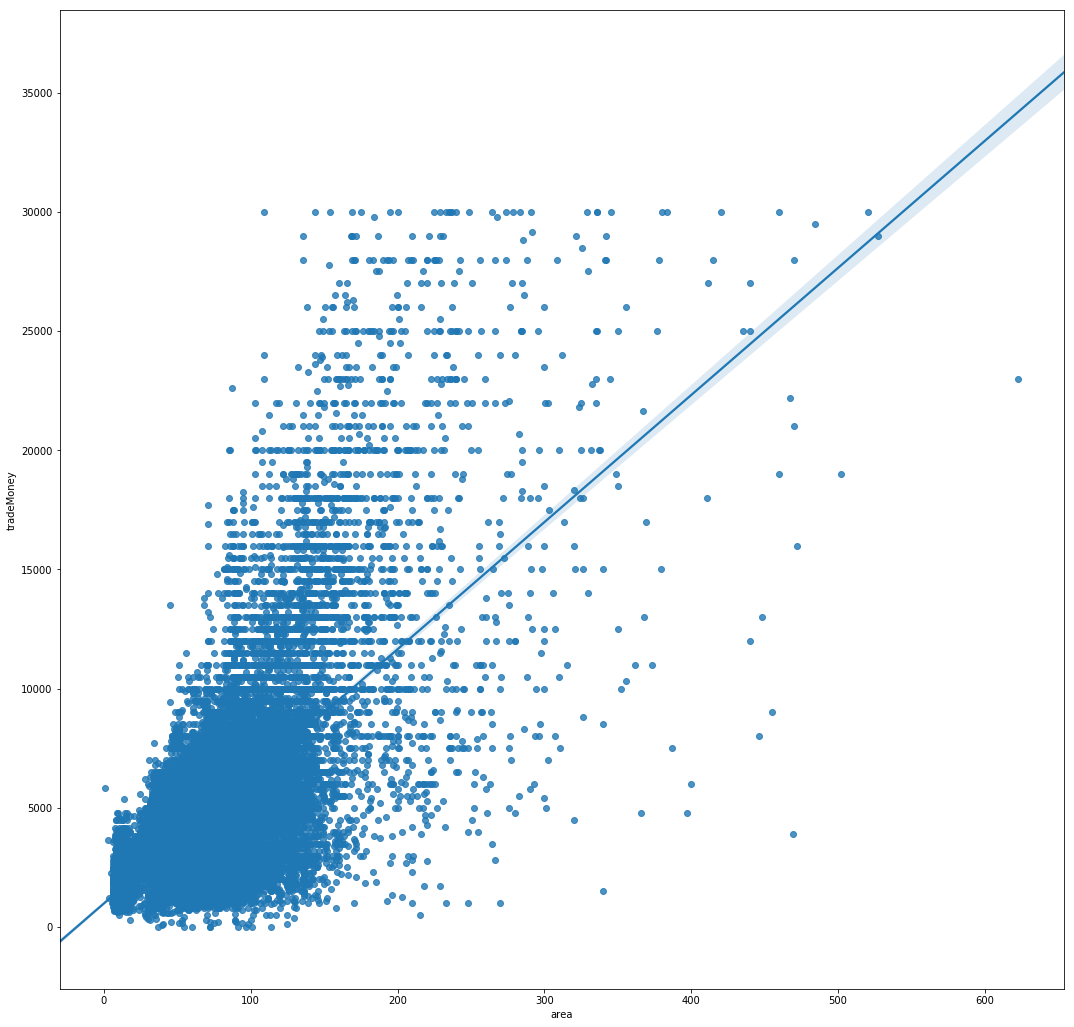

In [55]:
plt.figure(figsize = (18, 18))
sns.regplot(x='area', y='tradeMoney', data=train)